# Requirements

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

# Configuration

In [2]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [3]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [4]:
# Navigate to a web page.
browser.get('https://www.apple.com/mk/')

In [5]:
# Print the page source code.
print(browser.page_source)

<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en-MK" lang="en-MK" prefix="og: http://ogp.me/ns#" class="js no-touch progressive-image no-reduced-motion no-edge no-ie css-mask enhanced-xp desktop no-tablet windows no-android no-retina no-safari no-old-safari chrome no-firefox no-iphone no-ipad no-old-macos" data-layout-name="evergreen"><head>
	
































<meta charset="utf-8">
<link rel="canonical" href="https://www.apple.com/mk/">


	
	<link rel="alternate" href="https://www.apple.com/" hreflang="en-US"><link rel="alternate" href="https://www.apple.com/ae-ar/" hreflang="ar-AE"><link rel="alternate" href="https://www.apple.com/ae/" hreflang="en-AE"><link rel="alternate" href="https://www.apple.com/am/" hreflang="en-AM"><link rel="alternate" href="https://www.apple.com/at/" hreflang="de-AT"><link rel="alternate" href="https://www.apple.com/au/" hreflang="en-AU"><link rel="alternate" href="https://www.apple.com/az/" hreflang="en-AZ"><link rel="alternate" href=

In [6]:
# Select an element from the page.
element = browser.find_element(By.CLASS_NAME, 'headline')

In [7]:
# Print the element's innner text.
print(element.text)

iPhone 16 Pro


# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping using **Selenium** on the website https://www.scrapethissite.com/pages/forms/. The task includes the extraction of **hockey team names** and their **wins** and **losses** in the respective **year** for a minimum of 25 hockey teams. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of wins and losses in the year 1990.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

In [66]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [68]:
browser = webdriver.Chrome(options=options)
url = 'https://www.scrapethissite.com/pages/forms/'
browser.get(url)

In [69]:
WebDriverWait(browser, 10).until(
    EC.presence_of_all_elements_located((By.CLASS_NAME, "team"))
)

[<selenium.webdriver.remote.webelement.WebElement (session="f980068b1f2581687cec15e67b5e73d9", element="f.340C945FB3183056D5EE7E3FA3196BBC.d.1C9812DDE1DF211164AA56CFE5BDBD5C.e.38")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f980068b1f2581687cec15e67b5e73d9", element="f.340C945FB3183056D5EE7E3FA3196BBC.d.1C9812DDE1DF211164AA56CFE5BDBD5C.e.39")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f980068b1f2581687cec15e67b5e73d9", element="f.340C945FB3183056D5EE7E3FA3196BBC.d.1C9812DDE1DF211164AA56CFE5BDBD5C.e.40")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f980068b1f2581687cec15e67b5e73d9", element="f.340C945FB3183056D5EE7E3FA3196BBC.d.1C9812DDE1DF211164AA56CFE5BDBD5C.e.41")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f980068b1f2581687cec15e67b5e73d9", element="f.340C945FB3183056D5EE7E3FA3196BBC.d.1C9812DDE1DF211164AA56CFE5BDBD5C.e.42")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f980068b1f2581687cec15e67

In [70]:
teams = browser.find_elements(By.CLASS_NAME, "team")

In [71]:
team_data = []

In [72]:
for team in teams:
    name = team.find_element(By.CLASS_NAME, "name").text
    year = team.find_element(By.CLASS_NAME, "year").text
    wins = int(team.find_element(By.CLASS_NAME, "wins").text)
    losses = int(team.find_element(By.CLASS_NAME, "losses").text)
    
    if year == "1990":
        team_data.append({"Team": name, "Wins": wins, "Losses": losses})

    if len(team_data) >= 25:
        break

In [73]:
browser.quit()

In [74]:
df = pd.DataFrame(team_data)

In [75]:
print(df)

                     Team  Wins  Losses
0           Boston Bruins    44      24
1          Buffalo Sabres    31      30
2          Calgary Flames    46      26
3      Chicago Blackhawks    49      23
4       Detroit Red Wings    34      38
5         Edmonton Oilers    37      37
6        Hartford Whalers    31      38
7       Los Angeles Kings    46      24
8   Minnesota North Stars    27      39
9      Montreal Canadiens    39      30
10      New Jersey Devils    32      33
11     New York Islanders    25      45
12       New York Rangers    36      31
13    Philadelphia Flyers    33      37
14    Pittsburgh Penguins    41      33
15       Quebec Nordiques    16      50
16        St. Louis Blues    47      22
17    Toronto Maple Leafs    23      46
18      Vancouver Canucks    28      43
19    Washington Capitals    37      36
20          Winnipeg Jets    26      43


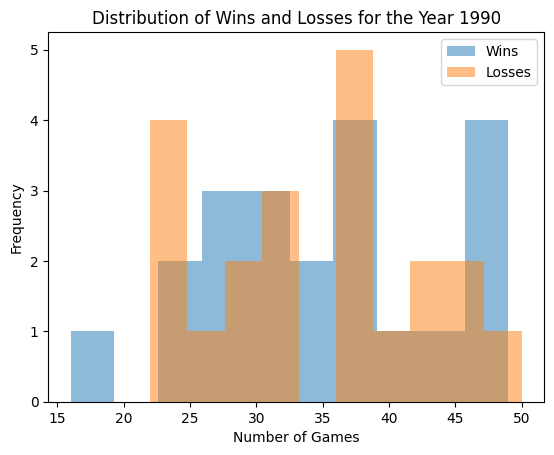

In [76]:
plt.hist(df["Wins"], bins=10, alpha=0.5, label="Wins")
plt.hist(df["Losses"], bins=10, alpha=0.5, label="Losses")
plt.xlabel("Number of Games")
plt.ylabel("Frequency")
plt.title("Distribution of Wins and Losses for the Year 1990")
plt.legend()
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

In the context of scraping the website https://www.scrapethissite.com/pages/forms/, the additional task involves searching for the hockey team 'Boston Bruins' using the available search field. You will extract the wins and losses data for this team covering the years from 1990 to 2011. After gathering this information, your task is to create a line plot where the wins and losses of the 'Boston Bruins' team are visualized across the years, displaying both trends on the same plot.

## Hints
- To populate an input field (`input_field`) with some `text` use `input_field.send_keys(text)`.
- To click on a specific `element` on a web page use `element.click()`.

## Solution